In [1]:
#Import the library

import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

#Seaborn is a Python data visualization library based on 
#matplotlib. It provides a high-level interface for drawing attractive
#and informative statistical graphics


In [2]:
#Reading the csv file and putting it into 'df= dataframe' object
df = pd.read_csv("heart_v2.csv")
df

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


In [3]:
df.head() #return the first n rows

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [6]:
#Putting the Feature Variable to X and Target variable to Y
X = df.drop('heart disease', axis=1) #drop column heart disease
y = df['heart disease'] 


In [7]:
#perform test_train_split to split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

In [8]:
#Let import the RandomForestClassifier and fit the data.
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1,
                                      max_depth=5, n_estimators=100,
                                      oob_score=True)

In [9]:
%%time
classifier_rf.fit(X_train, y_train)

CPU times: user 222 ms, sys: 72.8 ms, total: 295 ms
Wall time: 294 ms


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [10]:
#Check the oob score used to validate the model
classifier_rf.oob_score_

0.656084656084656

In [11]:
#Let's do hyperparameter tuning for Random forest using GridSearchCv and fit data.
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params={'max_depth':[2,3,5,10,20],
       'min_samples_leaf':[5,10,20,50,100,200],
       'n_estimators':[10,25,30,50,100,200]
       }

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
#Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                          param_grid=params,
                          cv=4,
                          n_jobs=-1,verbose=1,scoring="accuracy")

In [14]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   40.4s


CPU times: user 3.13 s, sys: 215 ms, total: 3.35 s
Wall time: 1min 5s


[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  1.1min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=42,
                                    

In [15]:
grid_search.best_score_

0.6985815602836879

In [16]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

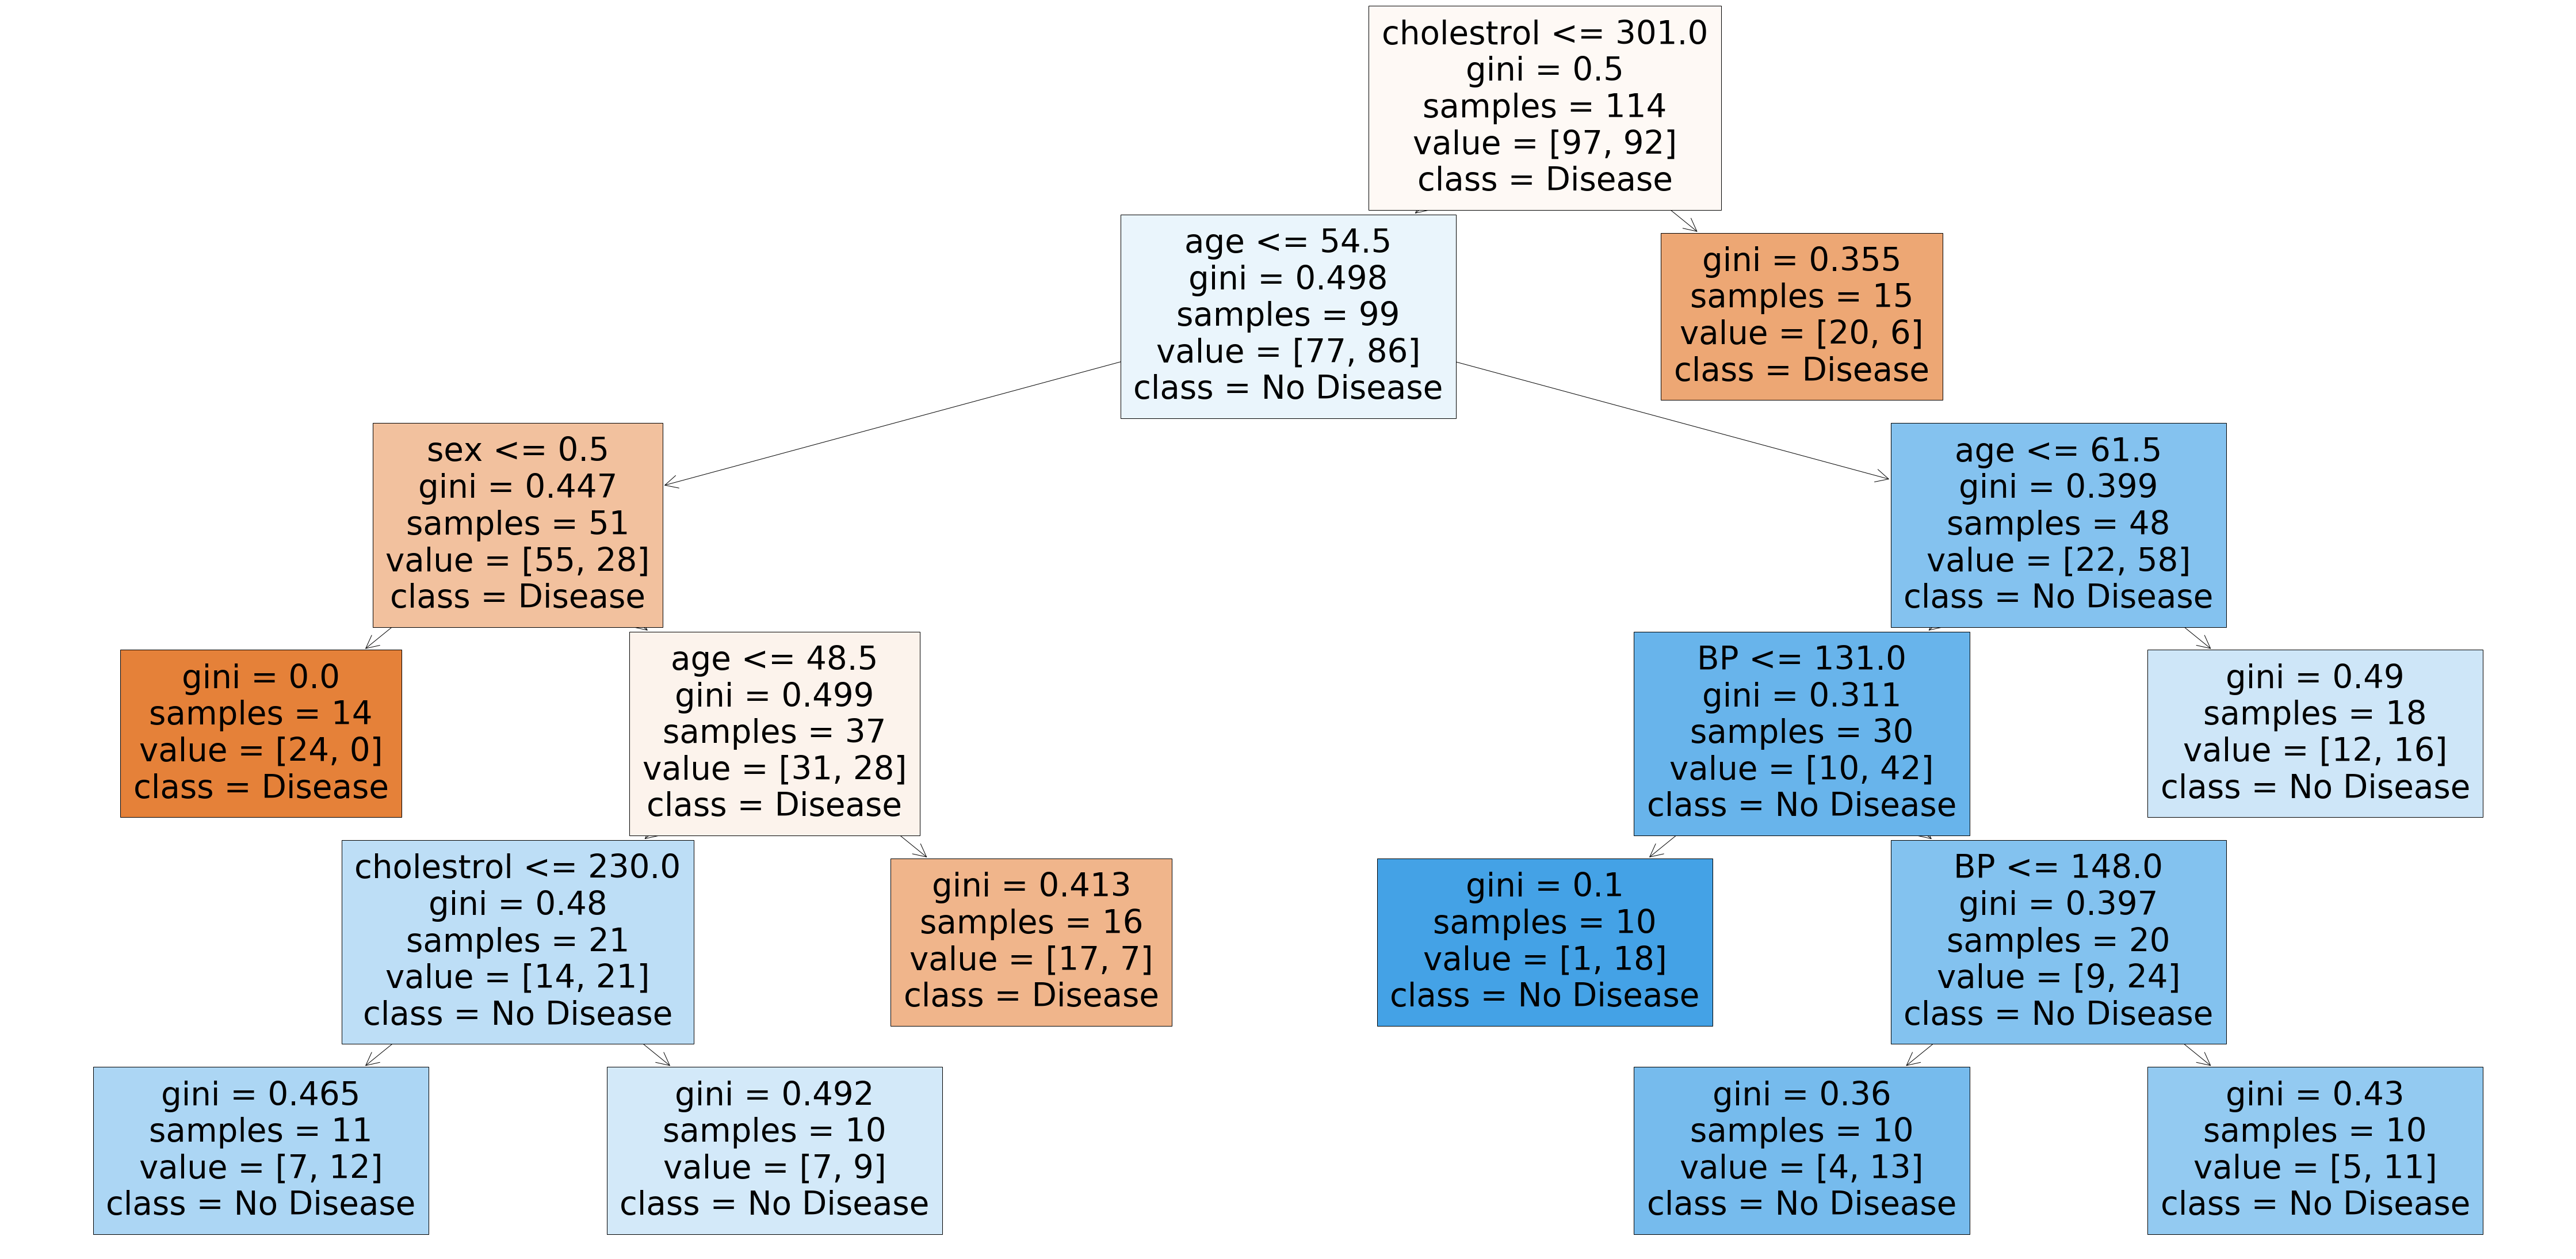

In [19]:
#Now lets visualize
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns, class_names=['Disease',"No Disease"], filled=True);

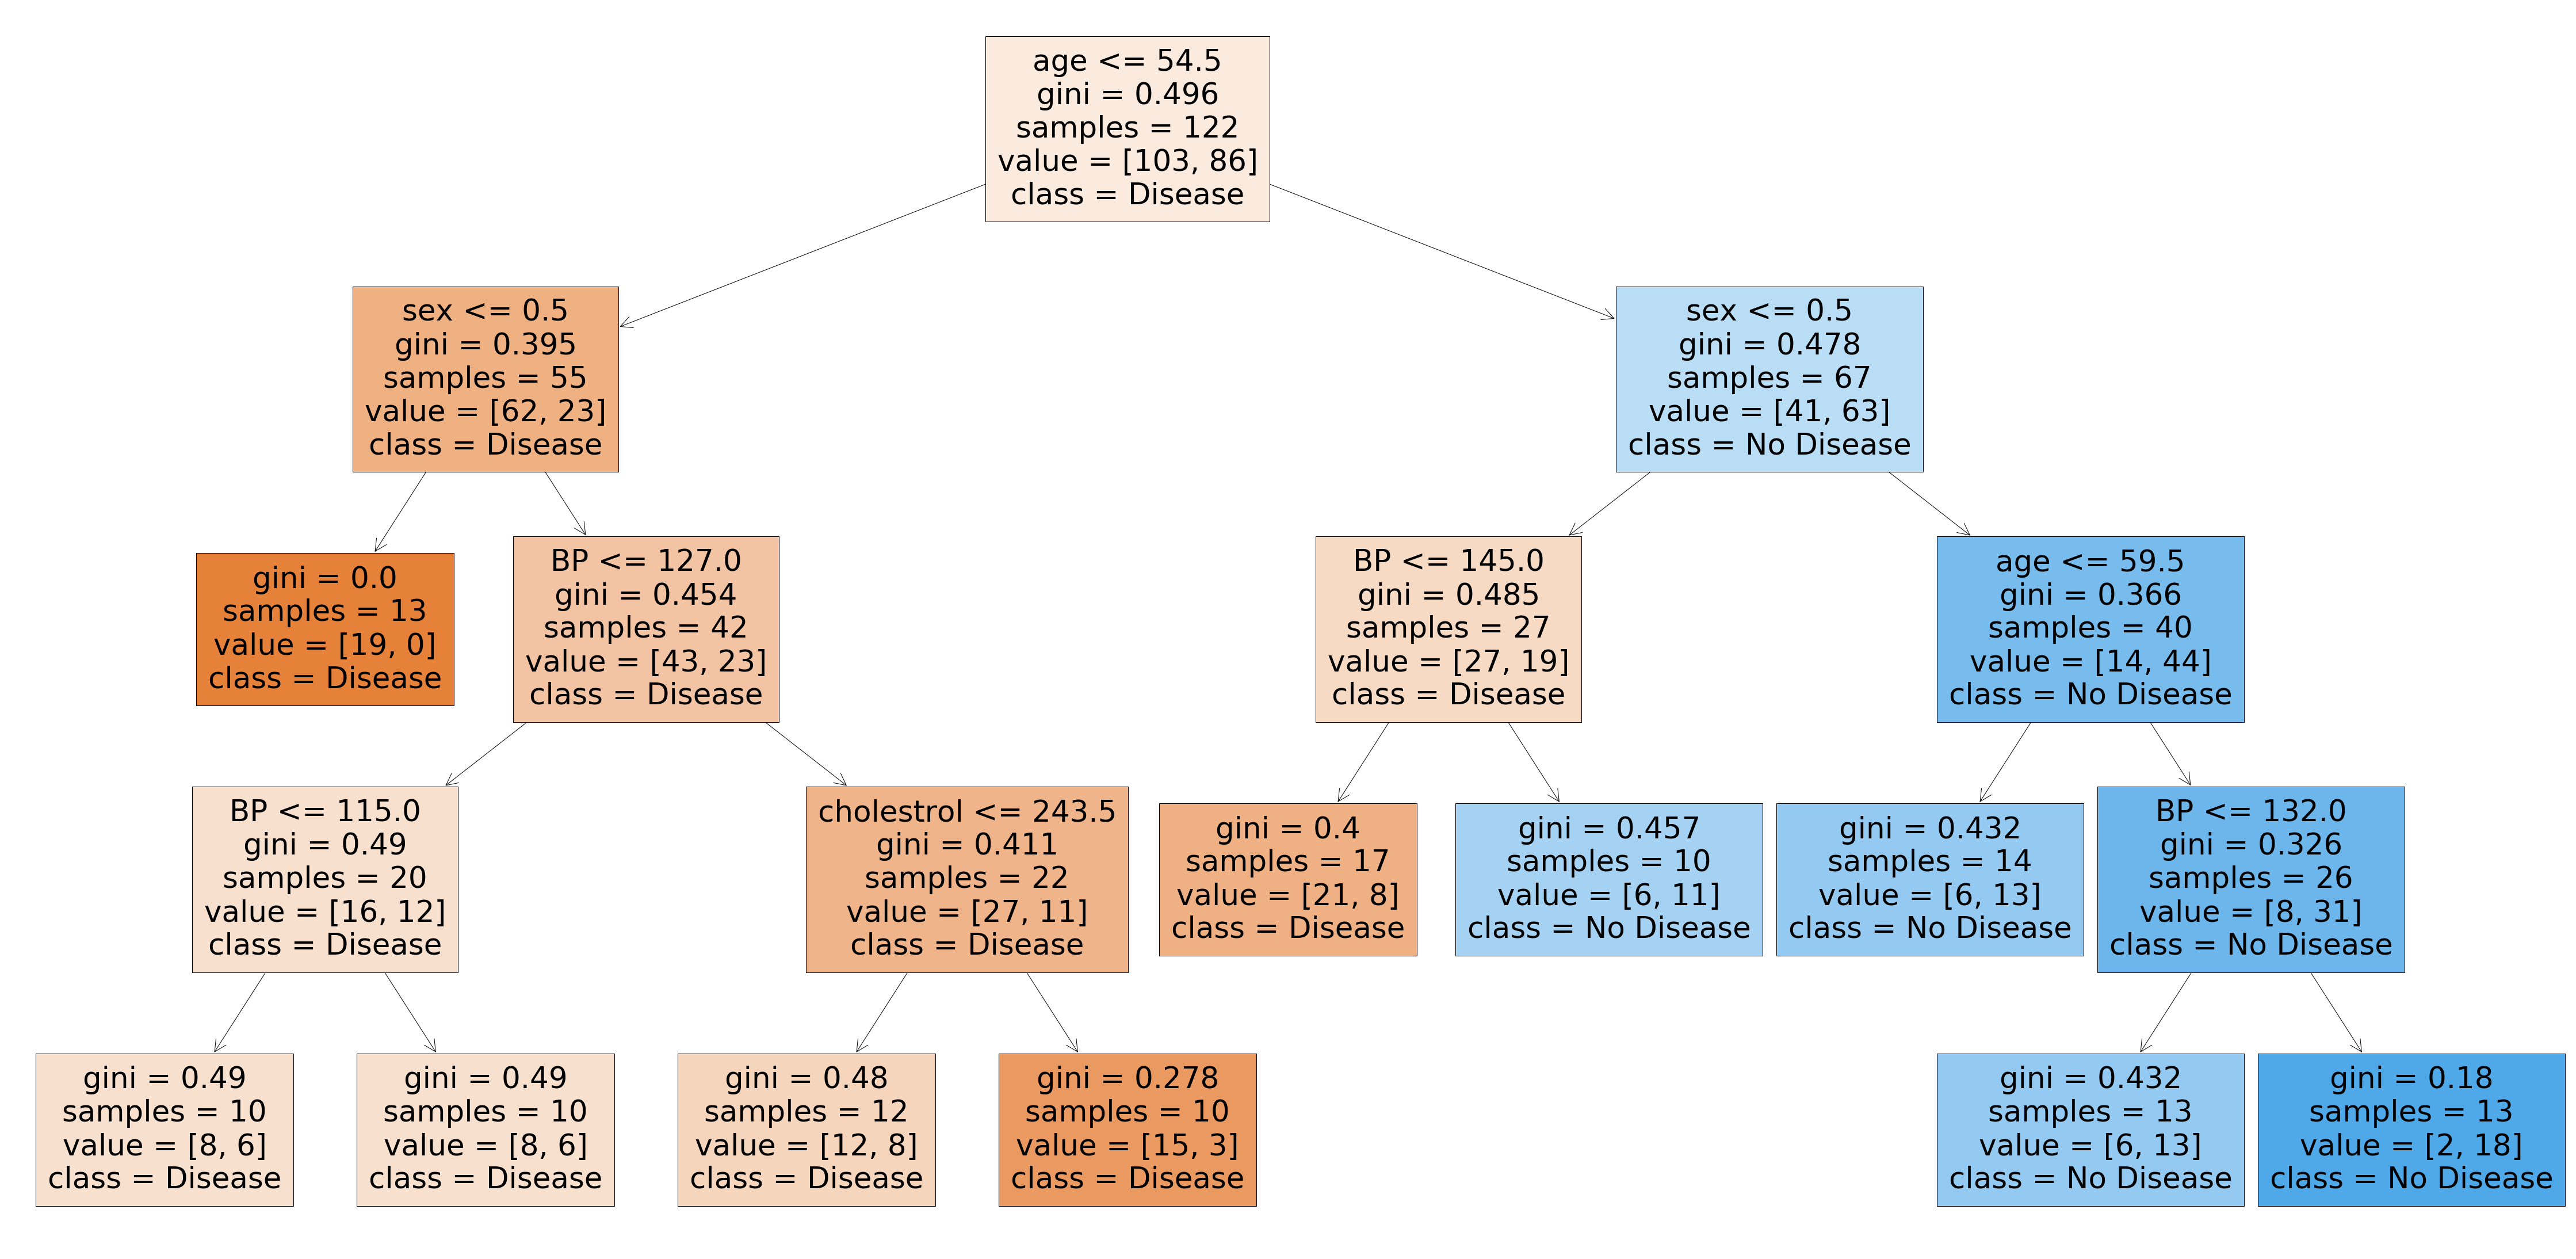

In [20]:
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns, class_names=['Disease',"No Disease"], filled=True);

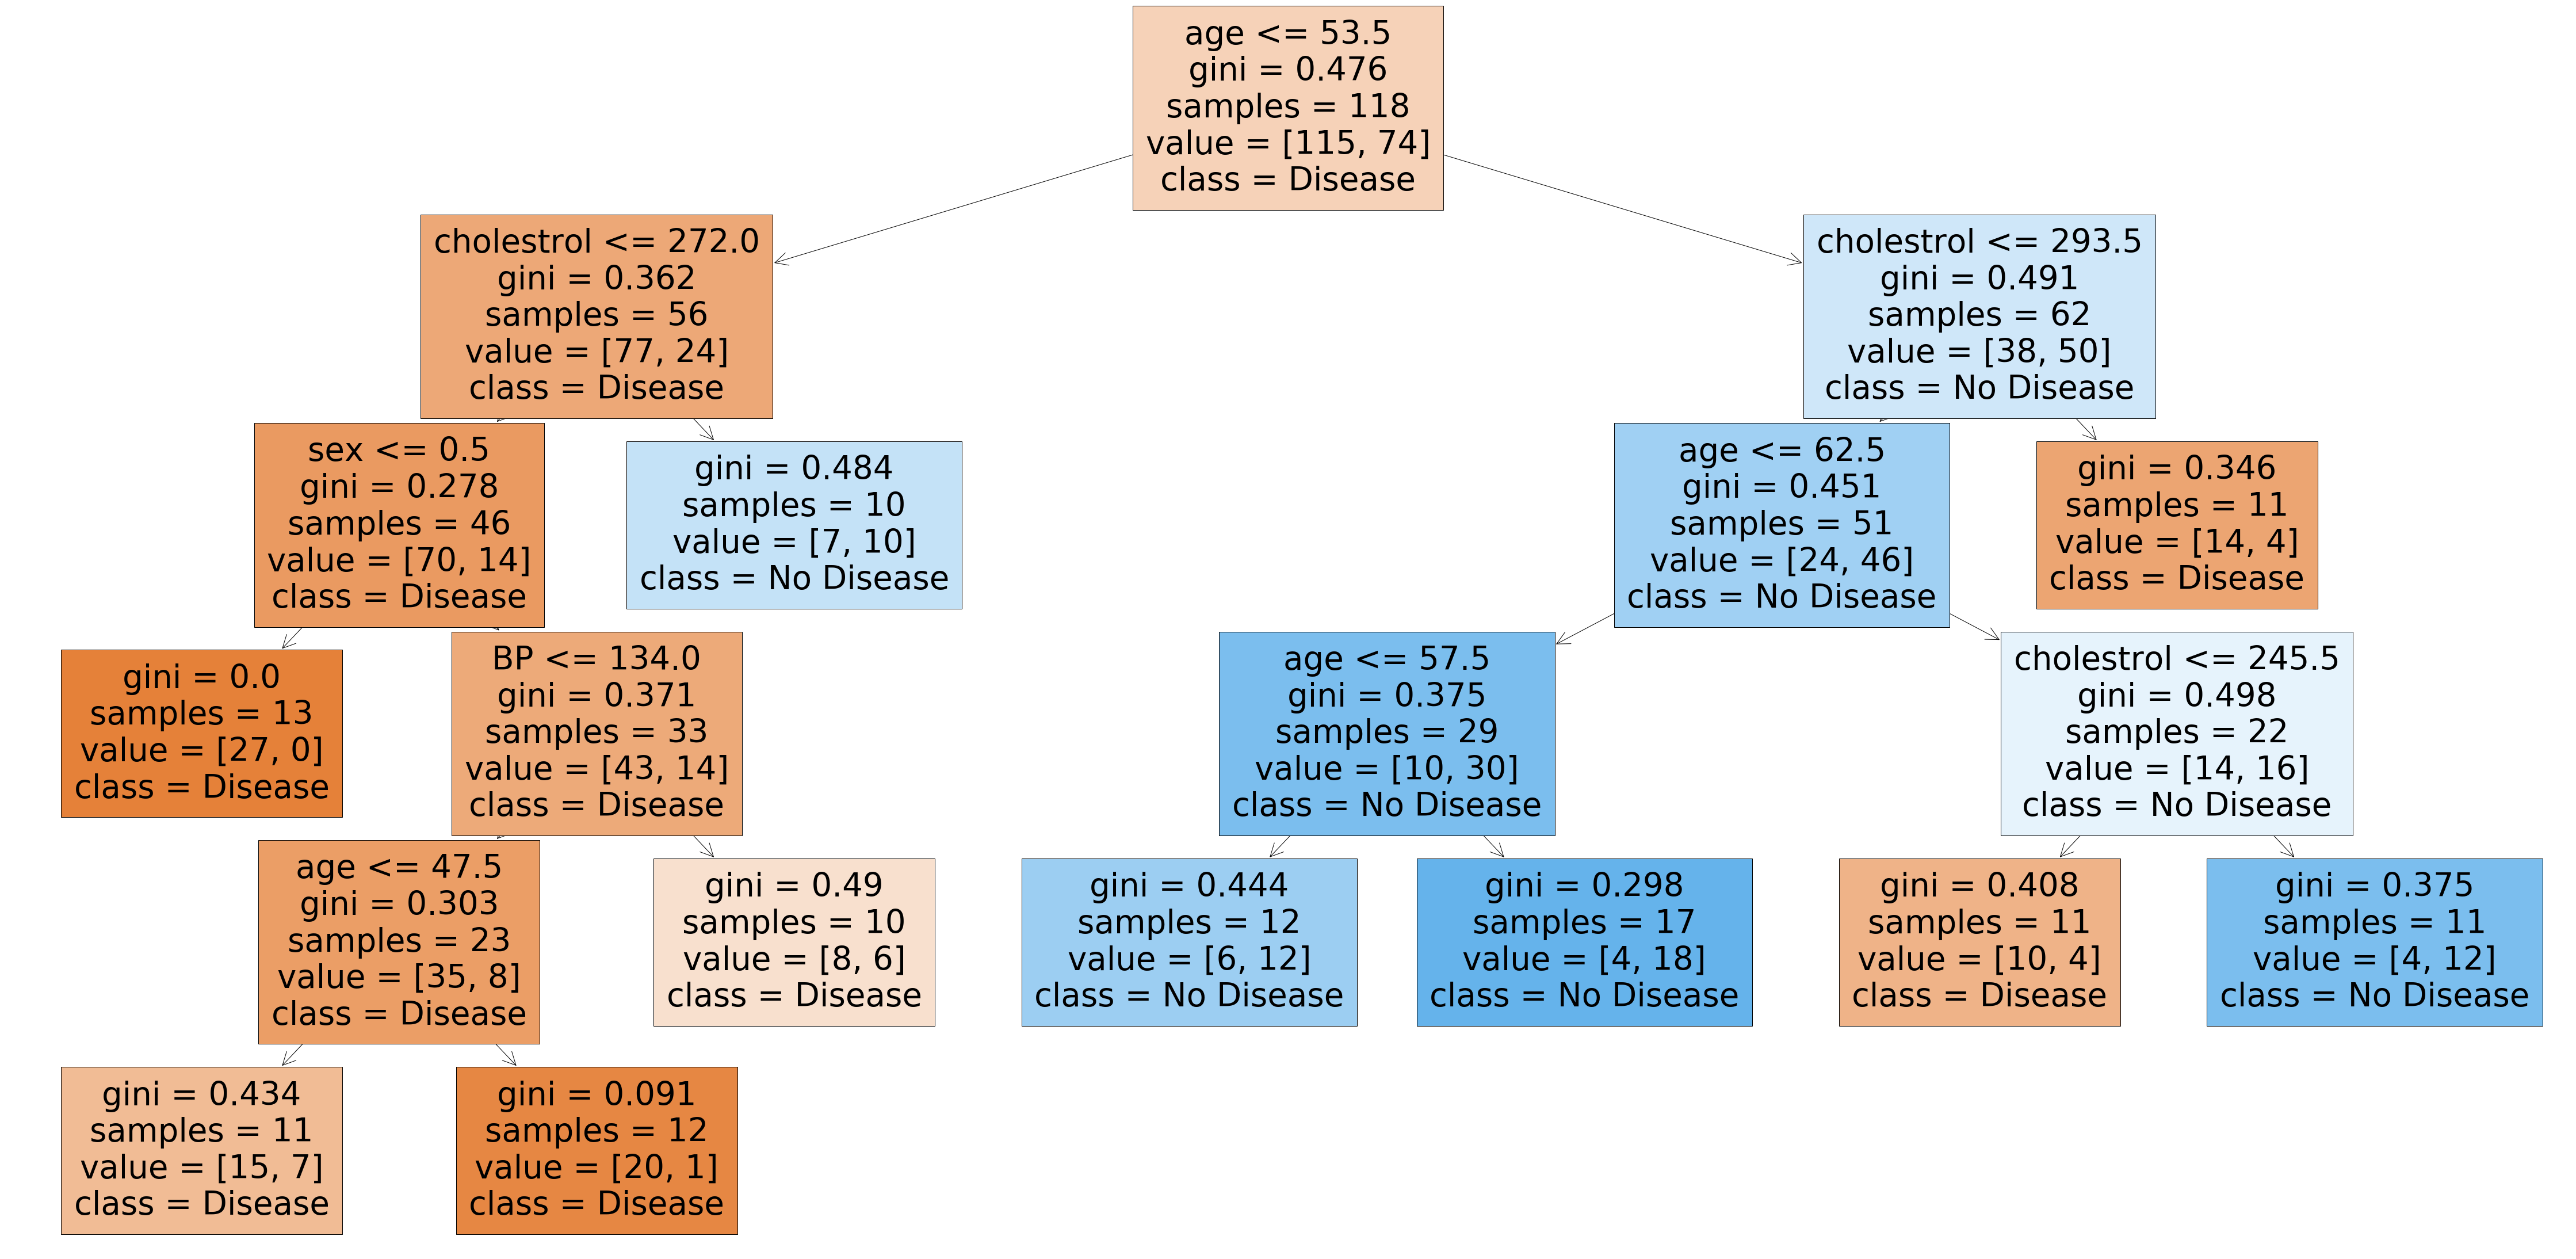

In [30]:
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[2], feature_names = X.columns, class_names=['Disease',"No Disease"], filled=True);

In [21]:
#Tree created by estimator_[5] and [7] are different. Thus we can say that each tree is independent of the other

In [31]:
#Sort data
rf_best.feature_importances_

array([0.46128487, 0.2180848 , 0.13174619, 0.18888413])

In [32]:
imp_df = pd.DataFrame({"Varname": X_train.columns,
                      "Imp": rf_best.feature_importances_})

In [33]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,age,0.461285
1,sex,0.218085
3,cholestrol,0.188884
2,BP,0.131746
